In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!git clone https://github.com/salathegroup/plantvillage_deeplearning_paper_dataset.git

Cloning into 'plantvillage_deeplearning_paper_dataset'...
remote: Counting objects: 163224, done.
remote: Total 163224 (delta 0), reused 0 (delta 0), pack-reused 163224
Receiving objects: 100% (163224/163224), 2.00 GiB | 10.83 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Checking out files: 100% (182401/182401), done.


In [5]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import cv2
import keras
import pickle
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
import os
PATH = os.getcwd()
# Define data path
data_path = 'plantvillage_deeplearning_paper_dataset/raw/segmented'
data_dir_list = os.listdir(data_path)
data_dir_list

['Grape___Black_rot',
 'Potato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Apple___healthy',
 'Tomato___Target_Spot',
 'Apple___Black_rot',
 'Strawberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Blueberry___healthy',
 'Tomato___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Septoria_leaf_spot',
 'Pepper,_bell___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Soybean___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___healthy',
 'Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___healthy',
 'Tomato___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Leaf_Mold',
 'Tomato___Late_blight',
 'Strawberry___Lea

In [0]:
crops=['Potato','Apple']

In [8]:
img_data_list=[]
label=[]
classes={}
l=-1
for dataset in data_dir_list:
  if any(x in dataset for x in crops):
    img_list=os.listdir(data_path+'/'+ dataset)
    l=l+1
    classes[l]=dataset
    print('l=',l)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
      input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
      input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
      input_img_resize=cv2.resize(input_img,(128,128))
      img_data_list.append(input_img_resize)
      label.append(l)

l= 0
Loaded the images of dataset-Potato___Early_blight

l= 1
Loaded the images of dataset-Apple___healthy

l= 2
Loaded the images of dataset-Apple___Black_rot

l= 3
Loaded the images of dataset-Potato___healthy

l= 4
Loaded the images of dataset-Apple___Apple_scab

l= 5
Loaded the images of dataset-Apple___Cedar_apple_rust

l= 6
Loaded the images of dataset-Potato___Late_blight



In [9]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13029         574         169         220       12284       11986
Swap:             0           0           0


In [10]:
print(len(img_data_list),len(label))
print(classes)

5323 5323
{0: 'Potato___Early_blight', 1: 'Apple___healthy', 2: 'Apple___Black_rot', 3: 'Potato___healthy', 4: 'Apple___Apple_scab', 5: 'Apple___Cedar_apple_rust', 6: 'Potato___Late_blight'}


In [11]:
print(img_data_list[0])
print(label[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


In [0]:
import numpy as np
data=np.asarray(img_data_list)

label=np.asarray(label)

In [13]:
data.shape

(5323, 128, 128)

In [14]:
label.shape

(5323,)

In [0]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.33,random_state=16)

In [16]:
train_data.shape[0]

3566

In [0]:
# input image dimensions
img_x, img_y = 128,128
x_train = train_data.reshape(train_data.shape[0], img_x, img_y, 1)
x_test = test_data.reshape(test_data.shape[0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)

In [0]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3566, 128, 128, 1)
3566 train samples
1757 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
num_classes=7
y_train=train_label
y_test=test_label
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

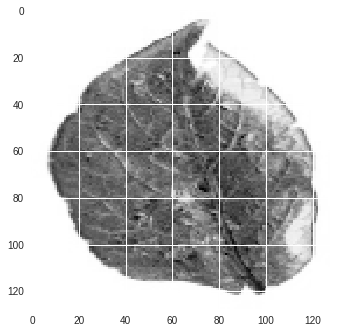

In [21]:
# Some examples
g = plt.imshow(x_train[0][:,:,0])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
__________

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 30
batch_size = 50

In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [32]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 18s - loss: 0.9349 - acc: 0.6728 - val_loss: 0.7164 - val_acc: 0.7575
Epoch 2/30
 - 18s - loss: 0.8642 - acc: 0.7047 - val_loss: 0.6948 - val_acc: 0.7547
Epoch 3/30
 - 18s - loss: 0.8367 - acc: 0.7058 - val_loss: 0.7247 - val_acc: 0.7553
Epoch 4/30
 - 18s - loss: 0.8317 - acc: 0.7105 - val_loss: 0.8159 - val_acc: 0.7302
Epoch 5/30
 - 18s - loss: 0.7942 - acc: 0.7223 - val_loss: 0.6263 - val_acc: 0.7843
Epoch 6/30
 - 18s - loss: 0.7848 - acc: 0.7218 - val_loss: 0.6591 - val_acc: 0.7803
Epoch 7/30
 - 18s - loss: 0.7357 - acc: 0.7351 - val_loss: 0.5780 - val_acc: 0.8088
Epoch 8/30
 - 18s - loss: 0.7156 - acc: 0.7504 - val_loss: 0.7224 - val_acc: 0.7439
Epoch 9/30
 - 18s - loss: 0.6994 - acc: 0.7498 - val_loss: 0.5740 - val_acc: 0.7951
Epoch 10/30
 - 18s - loss: 0.6936 - acc: 0.7535 - val_loss: 0.7169 - val_acc: 0.7672
Epoch 11/30
 - 18s - loss: 0.6560 - acc: 0.7673 - val_loss: 0.5986 - val_acc: 0.7803

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00050000002374

In [41]:
!pip install h5py

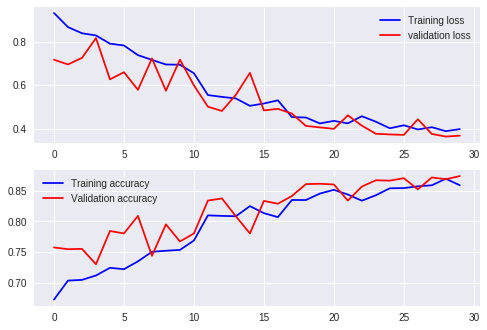

In [33]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [43]:
# evaluate the model
scores = model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 91.95%


In [44]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 87.36%


In [49]:
filename = './drive/datasets/leafmodel.h5'
# serialize weights to HDF5
model.save_weights(filename)
print("Saved model to disk")

Saved model to disk
